In [1]:
import numpy as np
from scipy import ndimage
import image_utils as iu
import alpha_utils as au
import model
import numpy as np
from scipy import misc
from scipy.signal import medfilt
import matplotlib.pyplot as plt

/home/mulns/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Open/Close operation : Extract inner and outer edge

In [2]:
alpha_path = "./Images/Alpha/puppy.jpg"
alpha = misc.imread(alpha_path, "F")/255.

/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


### Evaluation

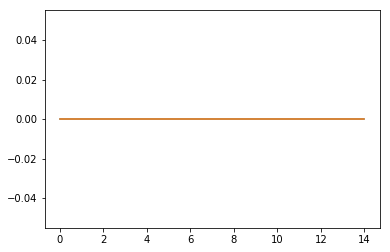

In [3]:
inn_edges = {}
for i in range(15):
    structure_size = (i+1, i+1)
    inn_edges["innedge_%d"%(i)] = au.innedge(alpha, structure_size)
out_edges = {}
for i in range(15):
    structure_size = (i+1, i+1)
    out_edges["outedge_%d"%(i)] = au.outedge(alpha, structure_size)
        
Losses_inn = au.loss_edge(alpha, **inn_edges)
Losses_out = au.loss_edge(alpha, **out_edges)
plt.plot(np.arange(len(Losses_inn)), Losses_inn, Losses_out)

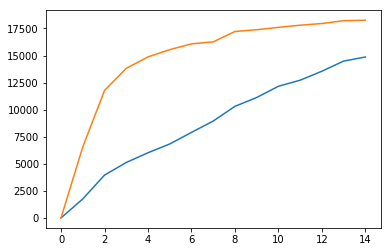

In [4]:
inn_edges = {}
for i in range(15):
    structure_size = (i+1, i+1)
    inn_edges["innedge_%d"%(i)] = au.innedge(alpha, structure_size, mode="close")
out_edges = {}
for i in range(15):
    structure_size = (i+1, i+1)
    out_edges["outedge_%d"%(i)] = au.outedge(alpha, structure_size, mode="close")
        
Losses_inn = au.loss_edge(alpha, **inn_edges)
Losses_out = au.loss_edge(alpha, **out_edges)
plt.plot(np.arange(len(Losses_inn)), Losses_inn, Losses_out)

In [5]:
# TODO:show the intends of edges in diff mode and structure_size.



In [7]:
# close_size = (9,9)
# al_innedge = innedg(alpha, structure_size=close_size)
# al_outedge = outedg(alpha, structure_size=close_size)
# # Losses_inn.append(np.sum((al_innedge*alpha!=al_innedge*255)))
# # Losses_out.append(np.sum((al_outedge|(alpha!=0)!=(alpha!=0))))
# shows = [alpha, al_innedge, al_outedge]
# for i in range(3):
#     plt.subplot(1, 3, i+1)
#     plt.imshow(shows[i][100:350,350:650], 'gray')
# plt.show()
# print(alpha.shape)
# # print(al_outedge[:5,:5])
# imsave("hr_innedge.png", al_innedge*255)
# imsave("hr_outedge.png", al_outedge*255)

# Image multiplication based on inner and outer edge

In [8]:
# # XXX How to generate trimap automatically?
# # trimap = gen_trimap(hr_fg)
# fg = lr_fg[:,:,0]
# fg_bin = (fg>50)
# fg_bin = ndimage.binary_closing(fg_bin, np.ones((20,20)))
# fg_bin_dila = ndimage.binary_dilation(fg_bin, np.ones((20,20)))
# fg_bin_eros = ndimage.binary_erosion(fg_bin, np.ones((30,30)))
# trimap = np.where((fg_bin_dila != fg_bin_eros), 128., fg_bin*255.)

# plt.imshow(trimap, 'gray')
# plt.show()

## LR image

In [3]:
scale = 2

hr_fg, _ = iu.modcrop(misc.imread("./Images/fg/puppy.jpg"), scale)
hr_bg, _ = iu.modcrop(misc.imresize(misc.imread("./Images/bg/grass.jpg"), hr_fg.shape), scale)
hr_alpha, _ = iu.modcrop(misc.imread("./Images/Alpha/puppy.jpg", "F"), scale)
hr_alpha /= 255.
if len(hr_alpha.shape)!= 2 : hr_alpha = hr_alpha[:,:,0]
hr_mi = au.merge_mi(hr_fg, hr_bg, hr_alpha)

lr_mi = misc.imresize(hr_mi, 1/scale, interp="bicubic")
lr_bg = misc.imresize(hr_bg, 1/scale, interp="bicubic")
lr_fg = misc.imresize(hr_fg, 1/scale, interp="bicubic")

# Generate LR alpha using interplotion
lr_alpha = misc.imresize(hr_alpha, 1/scale, interp="bicubic")/255.

/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and wi

## Upscaling by interplotion directly

PSNR of bicubic interplotion is  41.305150296753645


/home/mulns/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


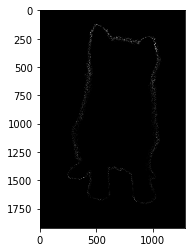

In [4]:
sr_alpha1 = misc.imresize(lr_alpha, hr_alpha.shape, interp="bicubic")/255.
print("PSNR of bicubic interplotion is ", au.psnr(sr_alpha1, hr_alpha))

plt.imshow(np.abs(sr_alpha1 - hr_alpha), 'gray')
# imsave("./Images/Alpha/sr_alpha1_psnr_41_305.jpg", np.abs(sr_alpha1 - hr_alpha)*255)

## Upscaling by edgs and interplotion

### Parameters Comparation

In [102]:
PSNR_EX = {}
for i in range(1,11):
    for j in range(1,11):
        sr_alpha2 = au.alpha_uscale(lr_alpha, scale, innex=(i,i), outex=(j,j), innup=(4,4), outup=(14,14))
        PSNR_EX["%d_%d"%(i, j)] = au.psnr(sr_alpha2, hr_alpha)

max(PSNR_EX.items(), key=lambda x: x[1]) 

('3_1', 41.30493925632578)

<Container object of 100 artists>

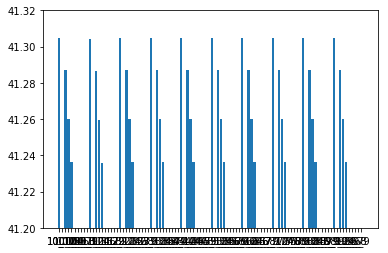

In [105]:
axes = plt.gca()  
axes.set_ylim([41.2,41.32]) 
x = list(PSNR_EX.keys())
y = list(PSNR_EX.values())
plt.bar(x,y,align='center')

In [79]:
PSNR_UP= {}
for i in range(1,11):
    for j in range(10,16):
        sr_alpha2 = au.alpha_uscale(lr_alpha, scale,innex=(11,11), outex=(1,1), innup=(i,i), outup=(j,j))
        PSNR_UP["%d_%d"%(i, j)] = au.psnr(sr_alpha2, hr_alpha)

max(PSNR_UP.items(), key=lambda x: x[1]) 

('4_14', 41.30487686380651)

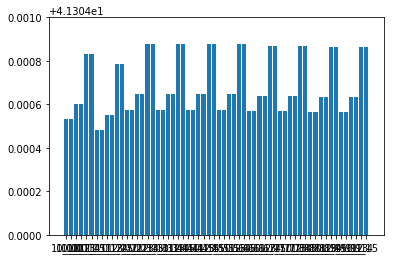

In [98]:
axes = plt.gca()  
axes.set_ylim([41.304,41.305]) 
x = list(PSNR_UP.keys())
y = list(PSNR_UP.values())
plt.bar(x,y, align='center')
plt.show()

### Show

PSNR of my solution is  41.30493925632578


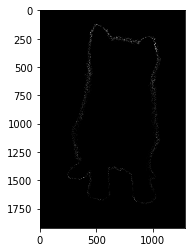

In [9]:
sr_alpha2 = au.alpha_uscale(lr_alpha, scale,innex=(3,3), outex=(1,1), innup=(4,4), outup=(14,14))
print("PSNR of my solution is ", au.psnr(sr_alpha2, hr_alpha))
plt.imshow(np.uint8(np.abs(sr_alpha2 - hr_alpha)*255), 'gray')

PSNR of my solution is  40.50364119145712


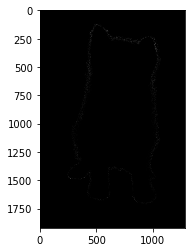

In [10]:
sr_alpha3 = au.alpha_uscale(lr_alpha, scale,innex=(9,9), outex=(9,9), innup=(9,9), outup=(9,9))
print("PSNR of my solution is ", au.psnr(sr_alpha3, hr_alpha))
plt.imshow(np.uint8(np.abs(sr_alpha3 - hr_alpha)*255), 'gray')